In [58]:
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from sklearn.metrics import f1_score


In [59]:
df_entrenamiento = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Oversampling/df_entrenamiento_sobre.csv')
df_val = pd.read_csv('C:/Users/tomas/OneDrive - Universidad de Chile/Semestre 2023-2 Archivos/Laboratorio de Programación Científica/Laboratorios/Github/casoCDD/Cruce/data_para_validar.csv')

In [60]:
df_entrenamiento

,Unnamed: 0.1,Unnamed: 0,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2,label
0,0,0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,4.944454,...,128.000000,16.000000,20.000000,7.111111,3.370625,101,311,4,4,1
1,1,1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.0,2.410485,...,90.000000,16.000000,6.000000,4.615385,2.844247,66,135,1,9,1
2,2,2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,3.794893,...,151.000000,47.000000,8.000000,2.950000,2.350252,297,221,4,8,1
3,3,3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.0,4.008391,...,201.000000,33.000000,9.000000,4.142857,3.084880,657,23,14,1,1
4,4,4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,9.352263,...,80.000000,19.000000,11.000000,3.411765,3.298841,365,514,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,603,260,0.926868,1.0,0.856774,1.000000,0.742882,0.779122,1.0,4.146378,...,158.818561,10.397845,1.325269,4.506014,3.697871,373,66,8,2,0
604,604,118,0.926484,1.0,0.897527,0.866209,0.942383,0.910806,1.0,5.895934,...,155.428576,17.183517,4.789011,4.455478,4.099863,649,152,13,2,0
605,605,316,0.957893,1.0,0.927401,0.947313,0.846920,1.000000,1.0,4.180800,...,193.937910,16.789254,12.107463,3.661868,3.333684,694,55,12,1,0
606,606,181,0.869460,1.0,0.836817,0.717063,0.831517,0.833140,1.0,6.648346,...,265.604752,30.586753,8.491001,3.184089,2.587531,327,148,5,4,0


In [61]:
df_entrenamiento.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'grade', 'seq_4_avg', 'quiz_avg',
       'seq_0_avg', 'seq_1_avg', 'seq_2_avg', 'seq_3_avg',
       'duracion_sesion_avg', 'duracion_sesion_std', 'duracion_EOL',
       'num_sesiones_agosto', 'num_sesiones_septiembre',
       'num_sesiones_octubre', 'page_close_mean', 'page_close_std',
       'problem_graded_mean', 'problem_graded_std', 'problem_check_mean',
       'problem_check_std', 'problem_show_mean', 'problem_show_std',
       'load_video_mean', 'load_video_std', 'play_video_mean',
       'play_video_std', 'pause_video_mean', 'pause_video_std',
       'speed_change_video_mean', 'speed_change_video_std',
       'num_eventos_seq_0', 'num_eventos_seq_1', 'num_eventos_seq_2',
       'num_eventos_seq_3', 'num_eventos_seq_4', 'avg_time_between_sessions',
       'std_time_between_sessions', 'nightactivity_2_to_5',
       'nightactivity_0_to_2', 'sesionesde_2_5', 'sesionesde_0_2', 'label'],
      dtype='object')

In [62]:
df_entrenamiento.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace=True)
X_new = df_val.drop(['username', 'Unnamed: 0'], axis=1)


In [63]:
df_entrenamiento

,grade,seq_4_avg,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,seq_3_avg,duracion_sesion_avg,duracion_sesion_std,duracion_EOL,...,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,nightactivity_2_to_5,nightactivity_0_to_2,sesionesde_2_5,sesionesde_0_2,label
0,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,4.944454,5.131721,64.000000,...,128.000000,16.000000,20.000000,7.111111,3.370625,101,311,4,4,1
1,0.990000,1.0,0.956897,1.000000,0.977273,1.000000,1.0,2.410485,2.627586,60.000000,...,90.000000,16.000000,6.000000,4.615385,2.844247,66,135,1,9,1
2,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,3.794893,5.967056,59.000000,...,151.000000,47.000000,8.000000,2.950000,2.350252,297,221,4,8,1
3,0.880000,1.0,0.850690,0.625000,0.909091,0.907778,1.0,4.008391,5.076566,58.000000,...,201.000000,33.000000,9.000000,4.142857,3.084880,657,23,14,1,1
4,1.000000,1.0,0.965517,1.000000,1.000000,1.000000,1.0,9.352263,8.270573,58.000000,...,80.000000,19.000000,11.000000,3.411765,3.298841,365,514,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.926868,1.0,0.856774,1.000000,0.742882,0.779122,1.0,4.146378,5.423557,53.686827,...,158.818561,10.397845,1.325269,4.506014,3.697871,373,66,8,2,0
604,0.926484,1.0,0.897527,0.866209,0.942383,0.910806,1.0,5.895934,6.046849,56.859341,...,155.428576,17.183517,4.789011,4.455478,4.099863,649,152,13,2,0
605,0.957893,1.0,0.927401,0.947313,0.846920,1.000000,1.0,4.180800,4.723150,53.842985,...,193.937910,16.789254,12.107463,3.661868,3.333684,694,55,12,1,0
606,0.869460,1.0,0.836817,0.717063,0.831517,0.833140,1.0,6.648346,6.103428,54.640749,...,265.604752,30.586753,8.491001,3.184089,2.587531,327,148,5,4,0


In [64]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import random
seed = 314159
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [65]:
#delete outliers
Q1 = df_entrenamiento.quantile(0.25)
Q3 = df_entrenamiento.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define a threshold to detect outliers (e.g., 1.5 times IQR)
threshold = 1.5

# Filter out rows with outliers based on the threshold
data_no_outliers = df_entrenamiento[~((df_entrenamiento < (Q1 - threshold * IQR)) | (df_entrenamiento > (Q3 + threshold * IQR))).any(axis=1)]

#borramos de nuevo para night activitu 
Q1 = df_entrenamiento['nightactivity_2_to_5'].quantile(0.25)
Q3 = df_entrenamiento['nightactivity_2_to_5'].quantile(0.75)

# Calculate the IQR (Interquartile Range) for the 'nightactivity_2_to_5' column
IQR = Q3 - Q1

# Define a threshold to detect outliers (e.g., 1.5 times IQR)
threshold = 1.5

# Filter out rows with outliers in the 'nightactivity_2_to_5' column based on the threshold
df_entrenamiento = df_entrenamiento[~((df_entrenamiento['nightactivity_2_to_5'] < (Q1 - threshold * IQR)) | (df_entrenamiento['nightactivity_2_to_5'] > (Q3 + threshold*IQR)))]

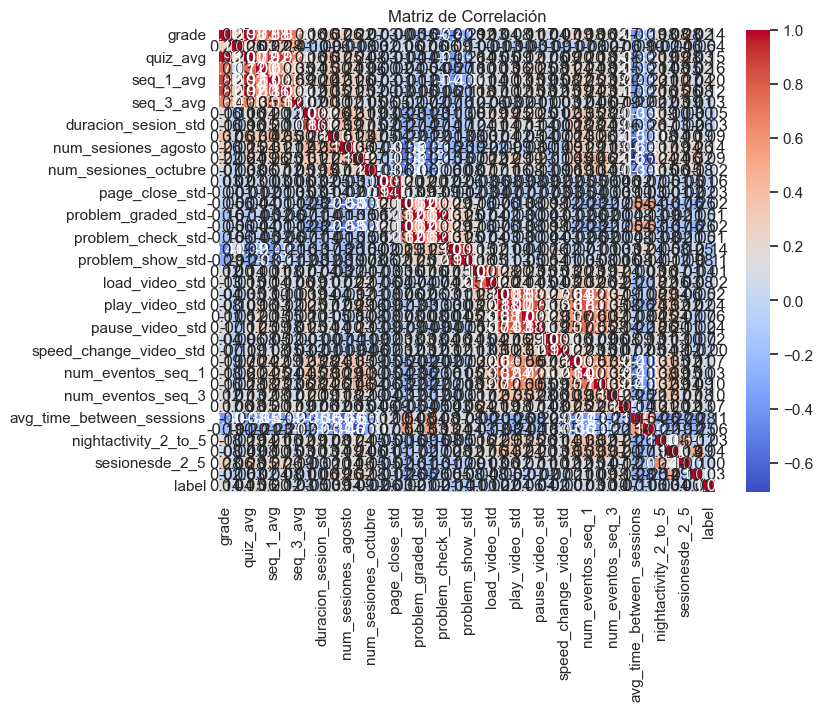

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
correlation_matrix = df_entrenamiento.corr()

# Visualizar la matriz de correlación utilizando seaborn y matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

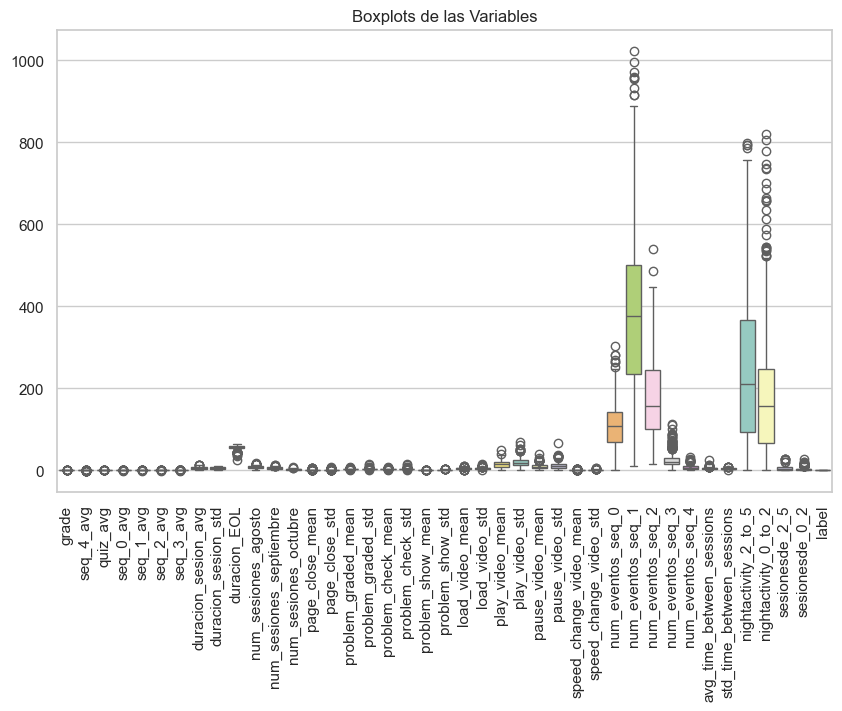

In [67]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear boxplots para cada variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_entrenamiento, palette="Set3")
plt.xticks(rotation=90)  
plt.title('Boxplots de las Variables')
plt.show()

['duracion_sesion_avg', 'seq_1_avg', 'speed_change_video_mean', 'speed_change_video_std', 'seq_0_avg', 'num_eventos_seq_3', 'num_eventos_seq_4', 'problem_show_mean', 'problem_check_mean', 'problem_check_std', 'num_sesiones_noviembre', 'num_eventos_seq_2', 'nightactivity_2_to_5', 'num_sesiones_septiembre', 'problem_show_std', 'avg_day_diff', 'duracion_sesion_std', 'nightactivity_0_to_2', 'pause_video_std', 'play_video_mean', 'std_dev_day_diff', 'pause_video_mean', 'problem_graded_mean', 'load_video_std', 'problem_graded_std', 'num_eventos_seq_0', 'load_video_mean', 'num_sesiones_agosto', 'duracion_EOL', 'play_video_std', 'num_eventos_seq_1', 'grade', 'quiz_avg', 'sesionesde_2_5', 'sesionesde_0_2', 'seq_3_avg', 'seq_2_avg', 'page_close_std', 'page_close_mean', 'seq_4_avg']

In [68]:
# Calcular la correlación entre todas las características y la etiqueta
correlation_matrix = df_entrenamiento.corr()
correlation_with_label = correlation_matrix['label'].abs()

# Seleccionar las características con mayor correlación
selected_features = correlation_with_label[correlation_with_label > 0.05].index.tolist()

# Crear un nuevo DataFrame con solo las características seleccionadas y la etiqueta
selected_data = df_entrenamiento[selected_features]

In [69]:
selected_data

,grade,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,duracion_sesion_avg,duracion_EOL,num_sesiones_agosto,num_sesiones_septiembre,page_close_mean,problem_show_mean,problem_show_std,pause_video_mean,num_eventos_seq_0,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions,label
0,1.000000,0.965517,1.000000,1.000000,1.000000,4.944454,64.000000,5.000000,3.000000,0.0,0.000000,0.000000,8.700000,76.000000,128.000000,16.000000,20.000000,7.111111,3.370625,1
1,0.990000,0.956897,1.000000,0.977273,1.000000,2.410485,60.000000,7.000000,5.000000,0.0,0.142857,0.534522,4.428571,70.000000,90.000000,16.000000,6.000000,4.615385,2.844247,1
2,1.000000,0.965517,1.000000,1.000000,1.000000,3.794893,59.000000,13.000000,7.000000,0.0,0.000000,0.000000,7.571429,197.000000,151.000000,47.000000,8.000000,2.950000,2.350252,1
3,0.880000,0.850690,0.625000,0.909091,0.907778,4.008391,58.000000,9.000000,5.000000,0.0,0.400000,0.632456,13.600000,177.000000,201.000000,33.000000,9.000000,4.142857,3.084880,1
4,1.000000,0.965517,1.000000,1.000000,1.000000,9.352263,58.000000,11.000000,6.000000,0.0,0.000000,0.000000,15.333333,264.000000,80.000000,19.000000,11.000000,3.411765,3.298841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.926868,0.856774,1.000000,0.742882,0.779122,4.146378,53.686827,6.674731,4.662635,0.0,0.276098,0.525444,6.231431,57.818561,158.818561,10.397845,1.325269,4.506014,3.697871,0
604,0.926484,0.897527,0.866209,0.942383,0.910806,5.895934,56.859341,7.140659,4.605494,0.0,0.322184,0.668790,8.403503,113.476921,155.428576,17.183517,4.789011,4.455478,4.099863,0
605,0.957893,0.927401,0.947313,0.846920,1.000000,4.180800,53.842985,5.789254,6.157015,0.0,0.558957,1.552358,6.939955,111.950448,193.937910,16.789254,12.107463,3.661868,3.333684,0
606,0.869460,0.836817,0.717063,0.831517,0.833140,6.648346,54.640749,9.113751,8.113751,0.0,0.108045,0.316410,12.410940,187.305256,265.604752,30.586753,8.491001,3.184089,2.587531,0


In [70]:
X = selected_data.drop(columns=['label'])  # Características


y = selected_data['label']  # Etiquetas



In [71]:
#X_new = X_new.drop(columns=['duracion_EOL', 'play_video_std', 'num_eventos_seq_1', 'grade', 'quiz_avg', 'sesionesde_2_5', 
#                                   'sesionesde_0_2', 'seq_3_avg', 'seq_2_avg', 'page_close_std', 'page_close_mean', 'seq_4_avg'])

In [72]:
'''
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Supongamos que 'df' es tu DataFrame original con las características numéricas que deseas clusterizar
# Selecciona solo las columnas numéricas
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

# Escala las características para asegurar que todas estén en la misma escala
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Determina el número óptimo de clústeres utilizando, por ejemplo, el método del codo
# Aquí uso el algoritmo KMeans como ejemplo
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Grafica el método del codo para ayudar a determinar el número óptimo de clústeres
import matplotlib.pyplot as plt
plt.plot(range(1, 100), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.show()
'''


"\nimport pandas as pd\nfrom sklearn.cluster import KMeans\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\n# Supongamos que 'df' es tu DataFrame original con las características numéricas que deseas clusterizar\n# Selecciona solo las columnas numéricas\nnumeric_columns = X.select_dtypes(include=['float64', 'int64'])\n\n# Escala las características para asegurar que todas estén en la misma escala\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(numeric_columns)\n\n# Determina el número óptimo de clústeres utilizando, por ejemplo, el método del codo\n# Aquí uso el algoritmo KMeans como ejemplo\nwcss = []\nfor i in range(1, 100):\n    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)\n    kmeans.fit(scaled_data)\n    wcss.append(kmeans.inertia_)\n\n# Grafica el método del codo para ayudar a determinar el número óptimo de clústeres\nimport matplotlib.pyplot as plt\nplt.plot(range(1, 100), wcss)\nplt.title('Método del Cod

In [73]:
'''
# Basándote en el gráfico del método del codo, elige el número óptimo de clústeres
optimal_clusters = 20  # ¡Ajusta esto según tu análisis del gráfico!

# Realiza la clusterización con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
X['cluster_label'] = kmeans.fit_predict(scaled_data)

# Ahora, 'cluster_label' contiene las etiquetas de clúster para cada fila en tu DataFrame
X
'''

"\n# Basándote en el gráfico del método del codo, elige el número óptimo de clústeres\noptimal_clusters = 20  # ¡Ajusta esto según tu análisis del gráfico!\n\n# Realiza la clusterización con el número óptimo de clústeres\nkmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)\nX['cluster_label'] = kmeans.fit_predict(scaled_data)\n\n# Ahora, 'cluster_label' contiene las etiquetas de clúster para cada fila en tu DataFrame\nX\n"

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314159, stratify=y)


In [75]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
'''
# Selecciona las columnas que deben ser escaladas
cols_to_scale = X_train.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Ajusta el scaler con los datos de entrenamiento solo para aquellas columnas que no están en el rango [0, 1]
scaler = MinMaxScaler()
for col in cols_to_scale:
    if X_train[col].min() < 0 or X_train[col].max() > 1:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        # Transforma también los datos de prueba usando el mismo scaler
        X_test[col] = scaler.transform(X_test[[col]])
        X_new[col] = scaler.transform(X_new[[col]])
'''
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X = scaler.fit_transform(X)



In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [86]:
import torch.nn.functional as F

class Deep(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(Deep, self).__init__()
        self.layer1 = nn.Linear(19, 60)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_rate)
        self.layer2 = nn.Linear(60, 120)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_rate)
        self.layer3 = nn.Linear(120, 60)
        self.act3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_rate)
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.dropout1(x)
        x = self.act2(self.layer2(x))
        x = self.dropout2(x)
        x = self.act3(self.layer3(x))
        x = self.dropout3(x)
        x = self.sigmoid(self.output(x))
        return x

In [87]:
import copy
import numpy as np
import torch.nn as nn
import torch.optim as optim
import tqdm

def model_train(model, X_train, y_train, X_val, y_val):
    # loss function and optimizer
    loss_fn = nn.BCELoss()  # binary cross entropy
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    n_epochs = 1000   # number of epochs to run
    batch_size = len(X_train)//64  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)

    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None

    for epoch in range(n_epochs):
        # print(epoch)
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return best_acc

In [88]:
from sklearn.model_selection import StratifiedKFold, train_test_split

# train-test split: Hold out the test set for final model evaluation
# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cv_scores = []
for train, test in kfold.split(X, y):
    # create model, train, and get accuracy
    model = Deep()
    acc = model_train(model, X[train], y[train], X[test], y[test])
    print("Accuracy (wide): %.2f" % acc)
    cv_scores.append(acc)

# evaluate the model
acc = np.mean(cv_scores)
std = np.std(cv_scores)
print("Model accuracy: %.2f%% (+/- %.2f%%)" % (acc*100, std*100))

Accuracy (wide): 0.83
Accuracy (wide): 0.75
Accuracy (wide): 0.77
Accuracy (wide): 0.70
Accuracy (wide): 0.82
Accuracy (wide): 0.83
Accuracy (wide): 0.83
Accuracy (wide): 0.80
Accuracy (wide): 0.85
Accuracy (wide): 0.73
Model accuracy: 79.10% (+/- 4.87%)


In [76]:
from sklearn.metrics import classification_report
# Hacer predicciones con el mejor modelo en el conjunto de prueba
y_pred = (best_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

4/4 [==============================] - 0s 5ms/step
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        61
           1       0.97      0.97      0.97        59

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [56]:
best_model.save("mejor_modelo.h5")


c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo
loaded_model = load_model("mejor_modelo.h5", compile=False, encoding='latin1')


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tomas\AppData\Local\Temp\ipykernel_18556\3224404754.py", line 4, in <module>
    loaded_model = load_model("mejor_modelo.h5", compile=False, encoding='latin1')
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\keras\src\saving\saving_api.py", line 262, in load_model
    return legacy_sm_saving_lib.load_model(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\tomas\anaconda3\envs\Lab_6\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _proce

In [59]:
from sklearn.metrics import classification_report
# Hacer predicciones con el mejor modelo en el conjunto de prueba
y_pred = (loaded_model.predict(X_test) > 0.5).astype(int)

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de clasificación:\n", report)

NameError: name 'loaded_model' is not defined

In [77]:
# Excluir la columna 'label' de selected_features si está presente
selected_features = [feature for feature in selected_features if feature != 'label']

# Filtrar el conjunto de datos con las características seleccionadas
X_new = X_new[selected_features]


In [78]:
X_new

,grade,quiz_avg,seq_0_avg,seq_1_avg,seq_2_avg,duracion_sesion_avg,duracion_EOL,num_sesiones_agosto,num_sesiones_septiembre,page_close_mean,problem_show_mean,problem_show_std,pause_video_mean,num_eventos_seq_0,num_eventos_seq_2,num_eventos_seq_3,num_eventos_seq_4,avg_time_between_sessions,std_time_between_sessions
0,0.94,0.905172,1.000000,0.980487,0.951093,0.285342,1.033899,0.460509,0.750000,0.000000,0.061224,0.098593,0.072022,0.181507,0.140108,0.187500,0.000000,0.113003,0.218534
1,0.79,0.758621,0.582588,0.687788,0.608748,0.712902,0.898302,0.258200,0.166667,0.000000,0.058442,0.098829,0.112818,0.147260,0.080473,0.008929,0.000000,0.370649,0.660515
2,0.85,0.818966,1.000000,0.824381,0.804374,0.501004,0.830504,0.460509,0.250000,0.000000,0.000000,0.000000,0.177285,0.243151,0.090092,0.196429,0.090909,0.229483,0.362409
3,0.80,0.773103,1.000000,0.824381,0.576469,0.409770,0.762706,0.460509,0.416667,0.000000,0.160714,0.253895,0.089681,0.294521,0.147802,0.133929,0.121212,0.162724,0.188366
4,0.95,0.913793,1.000000,0.804868,1.000000,0.306047,0.932202,0.393072,0.333333,0.000000,0.281250,0.396394,0.232687,0.280822,0.099710,0.178571,0.121212,0.192858,0.360120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.78,0.750000,0.582588,0.590222,0.706561,0.270298,0.288117,0.055890,0.166667,1.010204,0.642857,0.627646,0.409972,0.215753,0.088168,0.366071,0.242424,0.467078,0.601827
139,0.95,0.913793,1.000000,0.843894,0.951093,0.335622,0.423713,0.123327,0.333333,0.000000,0.183673,0.350409,2.700831,0.667808,1.717539,0.446429,0.272727,0.146034,0.244144
140,0.74,0.710000,0.582588,0.590222,0.593098,0.173901,0.423713,0.123327,0.500000,0.000000,0.642857,0.554045,0.349030,0.633562,0.653735,0.473214,0.060606,0.122689,0.225302
141,0.59,0.568966,0.165175,0.375576,0.266402,0.456174,0.355915,0.258200,0.166667,0.000000,0.000000,0.000000,0.278519,0.222603,0.172811,0.089286,0.000000,0.226006,0.753108


In [79]:
# Realizar predicciones con el modelo cargado
y_pred = (best_model.predict(X_new) > 0.5).astype(int)

# Agregar las predicciones como una nueva columna al conjunto de datos original
resultados = pd.DataFrame({'username': df_val['username'], 'Prediccion': y_pred.flatten()})

# Guardar los resultados en un archivo CSV
resultados.to_csv('resultados_predichos1.csv', index=False)

5/5 [==============================] - 0s 14ms/step
